# OUTLINE
This notebook contains training and evaluation phase for the linear model based on the:
- **One-hot** encodings 
- **PESTO** embeddings

# Linear model 

In [1]:
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from utils import *
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score, auc
import re
import training_and_evaluation 
from datasets import AASequenceDatasetLinear 

In [2]:
def my_collate(x):
    '''
    Converts array<tuple> to tuple<array>.
    
    Paramaters
    ----------
    x : array<tuple>
    
    Returns
    -------
    tuple<array>
        Converted array of tuples
    '''
    return list(zip(*x))

In [3]:
# Train data path
TRAIN_DATA_PATH = './data/merged_data_train_v2.tsv'

# Test data path
TEST_DATA_PATH = './data/merged_data_test_v2.tsv'

# Determining the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 1. Linear model with one-hot encodings

#### Loading the dataset and splitting it

In [4]:
# Loading training dataset
sequence_dataset = AASequenceDatasetLinear(TRAIN_DATA_PATH, use_embeddings=False, num_neighbours=20)

#### The training
Defining parameters:

In [5]:
# Fixing unbalaced data problem
pos_weight = torch.tensor(11.46)

# Dec21_14-39-53_lbmpc2Linear50
model = nn.Sequential(nn.Linear(420,128, dtype=torch.float64),
                       *([nn.Sequential(nn.Linear(128,128, dtype=torch.float64) , nn.ELU()) for i in range(8)]),
                       nn.Linear(128,1, dtype=torch.float64) ).to(device)
# Loss function
loss_fn = nn.BCEWithLogitsLoss(pos_weight= pos_weight) 

# Optimizer 
opt = optim.Adam(model.parameters(), lr=0.001)

# Defining number of epochs
epoch_num = 30

Training:

In [ ]:
# Training model
training_and_evaluation.train_model(model=model,
                                    sequence_dataset=sequence_dataset,
                                    epoch_num=epoch_num,
                                    opt=opt,
                                    loss_fn=loss_fn,
                                    device=device,
                                    file_path='./saved_models/linear_test.nerf',
                                    writer_comment='linear_test',
                                    my_collate=my_collate
                                   )

#### Model evaluation

Loading the model:

In [6]:
# Loading saved model
model = torch.load('./saved_models/model50.nerf')

Loading the test dataset:

In [8]:
# Loading test dataset
test_set = AASequenceDataset(TEST_DATA_PATH, use_embeddings=True, num_neighbours=0)

# Creating test DataLoader
test_dataloader = DataLoader(test_set, batch_size=300,
                        shuffle=True, num_workers=0, collate_fn=my_collate)

Evaluation of the model:

/tmp/ipykernel_1620597/1540175652.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq = torch.tensor(seq).to(device)


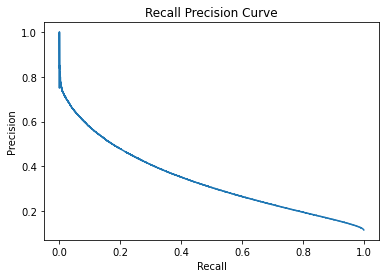

RecallPrecisionAUC: 0.33896689448724465
AveragePrecision: 0.33896837900591853


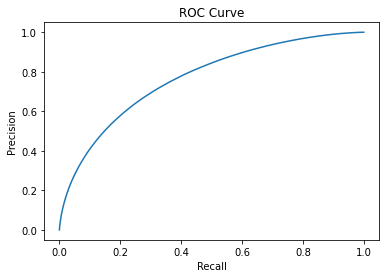

ROC_AUC: 0.7669910978713722


In [22]:
# Evaluating the model
training_and_evaluation.evaluate_model(model, test_dataloader, device)

## 1. Linear model with PESTO embeddings

#### Loading the dataset and splitting it

In [ ]:
# Loading training dataset
sequence_dataset = AASequenceDatasetLinear(TRAIN_DATA_PATH, use_embeddings=True, num_neighbours=0)

#### The training
Defining parameters:

In [ ]:
# Fixing unbalaced data problem
pos_weight = torch.tensor(11.46)

# Dec21_14-39-53_lbmpc2Linear50
model = nn.Sequential(nn.Linear(64,32, dtype=torch.float64),
                      *([nn.Sequential(nn.Linear(32,32, dtype=torch.float64) , nn.ELU()) for i in range(2)]),
                      nn.Linear(32,1, dtype=torch.float64)).to(device)
# Loss function
loss_fn = nn.BCEWithLogitsLoss(pos_weight= pos_weight) 

# Optimizer 
opt = optim.Adam(model.parameters(), lr=0.001)

# Defining number of epochs
epoch_num = 30

Training:

In [ ]:
# Training the model
training_and_evaluation.train_model(model=model,
                                    sequence_dataset=sequence_dataset,
                                    epoch_num=epoch_num,
                                    opt=opt,
                                    loss_fn=loss_fn,
                                    device=device,
                                    file_path='./saved_models/linear_pesto.nerf',
                                    writer_comment='pesto_test',
                                    my_collate=my_collate
                                   )

#### Model evaluation

Loading the model:

In [6]:
# Loading saved model
model = torch.load('./saved_models/modelPesto0.nerf')

Loding the test dataset:

In [8]:
# Loading test dataset
test_set = AASequenceDataset(TEST_DATA_PATH, use_embeddings=True, num_neighbours=0)

# Creating test DataLoader
test_dataloader = DataLoader(test_set, batch_size=300,
                        shuffle=True, num_workers=0, collate_fn=my_collate)

Evaluation of the model:

/data/student/training_and_evaluation.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq = torch.tensor(seq).to(device)


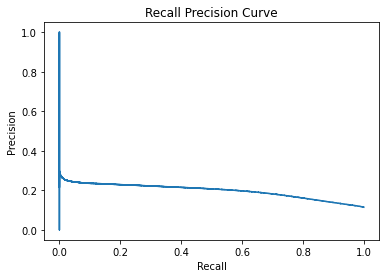

RecallPrecisionAUC: 0.19781890039371658
AveragePrecision: 0.19782053512838507


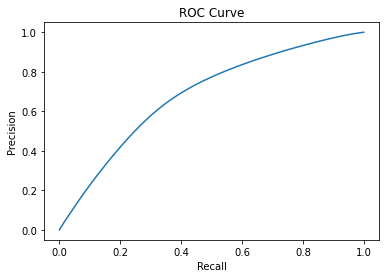

ROC_AUC: 0.6838342090507552


In [9]:
# Evaluating the model
training_and_evaluation.evaluate_model(model, test_dataloader, device)